In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import Reactor_V1 as rf

%matplotlib inline

In [38]:
data = pd.read_csv('Run_5P_edit.csv')
hplc_data = pd.read_csv('Data1.csv')

In [15]:
data.head()

,Unnamed: 0,Time,Temperature(C),pH,Dosing,Gas_analyser_CO2%,Gas_analyser_O2%,CO2_Flow_rate(ml/min),O2_Flow_rate_(ml/min),Dosing_(RPM),Feed_(RPM),Dosing_average_(on/off),CO2_rate_(mol/Cmol/min),O2_rate_(mol/Cmol/min),Fumaric_rate_(Cmol/Cmol/min),Ethanol_rate_(Cmol/Cmol/min)
0,0,0.000000,30.475392,5.603549,0.0,6.640968,20.396430,8.678655,0.0,5.1,2.7,0.824215,-7.452582,2.039622,0.011274,-10.820548
1,1,0.000278,30.535807,5.602112,0.0,6.640122,20.384183,8.677337,0.0,5.1,2.7,0.823938,-7.454882,1.989599,0.011270,-10.925196
2,2,0.000556,30.554946,5.595226,0.0,6.640558,20.399339,8.678728,0.0,5.1,2.7,0.823660,-7.454305,2.051447,0.011267,-10.800346
3,3,0.000833,30.603234,5.570871,0.0,6.640514,20.376400,8.678644,0.0,5.1,2.7,0.823382,-7.454413,1.958305,0.011263,-10.986849
4,4,0.001111,30.628962,5.562353,0.0,6.636283,20.398931,8.678705,0.0,5.1,2.7,0.823105,-7.471643,2.049785,0.011259,-10.838352


In [24]:
time = np.array(data['Time'])
r_co2 = np.array(data['CO2_rate_(mol/Cmol/min)'])
r_o2 = np.array(data['O2_rate_(mol/Cmol/min)'])
dosing_avg = np.nan_to_num(np.array(data['Dosing_average_(on/off)']))
dosing_rpm = np.array(data['Dosing_(RPM)'])
dosing_raw = np.array(data['Dosing'])
comp_co2 = np.array(data['Gas_analyser_CO2%'])
comp_o2 = np.array(data['Gas_analyser_O2%'])
flow_o2 = np.array(data['CO2_Flow_rate(ml/min)'])
flow_co2 = 99.9
temp = np.array(data['Temperature(C)'])

In [40]:
# volume test

# 84.8961 hrs from start to R7.5

i_start = int(len(time) * 110.5/time[-1])

sum_avg = np.sum(dosing_avg[i_start::])
sum_raw = np.sum(dosing_raw[i_start::])

error = (sum_avg - sum_raw)/sum_raw *100
print (error)

2.0554775953860007


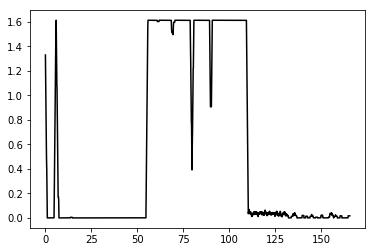

In [48]:
# fumaric production
""" rate of fumaric is calculated by converting the rate of NaOH dosing to fumaric production"""

rpm = 2
mmx = 24.04 # g/cmol C H 1.8 O 0.5 N 0.16

flowrate_naoh = dosing_avg * (0.05228291711 * rpm - 0.005367597828)/1000 #l/min
rate_f = 10 * 2 * flowrate_naoh * (1.087/(1.93/mmx)) * 60 # mol/l * mol_f/mol_naoh * ml/min = mmol/min

plt.plot(time,rate_f, 'k')
# plt.plot(time[i_start::],data['Fumaric_rate_(Cmol/Cmol/min)'][i_start::]*1000)
plt.show()

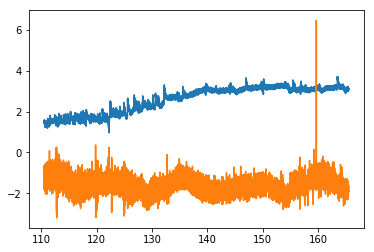

In [46]:
# gas analysis

V = 22.4 #L
R = 8.3144598E-2 #L⋅bar⋅K−1⋅mol−1
P = 1.01325 #bar
T = 273.15 + 35 #K
#PV = nRT
n = P*V/(R*T)


comp_co2_0 = 8.4768/100 #%
comp_o2_0 = 19.894/100 #%


Qtotal = (flow_co2 + flow_o2)/1000 # L/min
Ftotal = Qtotal*P/(R*temp) # mol/min
Fco2_in = Qtotal*P/(R*temp)*comp_co2_0 # mol/min
Fo2_in = Qtotal*P/(R*temp)*comp_o2_0
Fco2_out = Qtotal*P/(R*temp)*comp_co2/100
Fo2_out = Qtotal*P/(R*temp)*comp_o2/100

mx = 1.93 / 24.04 #cmol

r_co2_cal = (Fco2_out - Fco2_in)/mx*1000 # mol/min/cmol 
r_o2_cal = (Fo2_out - Fo2_in)/mx*1000

plt.plot(time[i_start::],r_co2_cal[i_start::])
plt.plot(time[i_start::],r_o2_cal[i_start::])

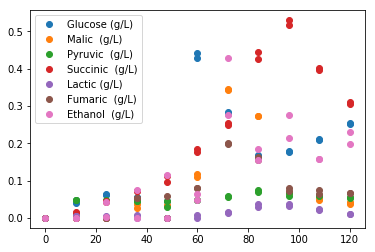

In [47]:
xTime = hplc_data['Exp Time']
Cg = hplc_data['Glucose (g/L)']
Cm = hplc_data['Malic  (g/L)']
Cp = hplc_data['Pyruvic  (g/L)']
Cs = hplc_data['Succinic  (g/L)']
Cl = hplc_data['Lactic (g/L)']
Cf = hplc_data['Fumaric  (g/L)']
Ce = hplc_data['Ethanol  (g/L)']

Ci = [Cg, Cm, Cp, Cs, Cl, Cf, Ce]

for i,c in enumerate(Ci):
#     if i == 6 or i == 5:
    
    plt.plot(xTime, c,'o', label = c.name)
    
plt.legend(loc = 'best')
plt.show()

In [13]:
Ci[0].name

'Glucose (g/L)'

In [23]:
hplc_data

""
